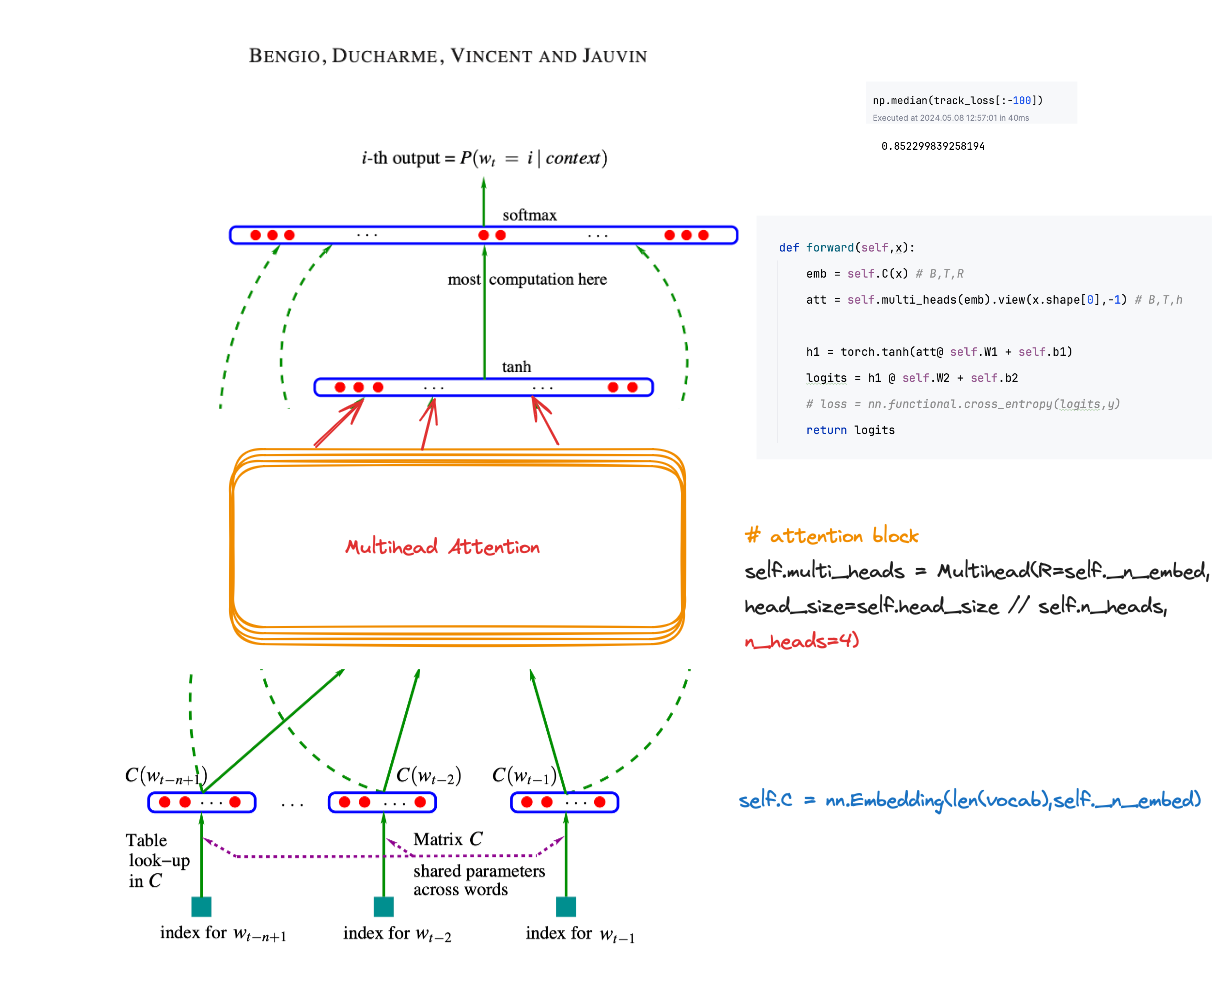

In [1]:
from IPython.display import Image
Image("bengio_multihead.png")

In [1]:
# now lets build the dataset
import torch
import torch.nn as nn

In [3]:
# we will look at a simpler dataframe . (This is only the categorical columns of the income dataset)
import pandas as pd
income = pd.read_csv("cat_income.csv",index_col=0)
income

,workclass,education,marital.status,occupation,relationship,race,sex,native.country,income
0,?,HS-grad,Widowed,?,Not-in-family,White,Female,United-States,<=50K
1,Private,HS-grad,Widowed,Exec-managerial,Not-in-family,White,Female,United-States,<=50K
2,?,Some-college,Widowed,?,Unmarried,Black,Female,United-States,<=50K
3,Private,7th-8th,Divorced,Machine-op-inspct,Unmarried,White,Female,United-States,<=50K
4,Private,Some-college,Separated,Prof-specialty,Own-child,White,Female,United-States,<=50K
...,...,...,...,...,...,...,...,...,...
32556,Private,Some-college,Never-married,Protective-serv,Not-in-family,White,Male,United-States,<=50K
32557,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,United-States,<=50K
32558,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States,>50K
32559,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,United-States,<=50K


In [4]:
# the combined vovabulary of the dataset is :
import numpy as np
vocab = []
for col in income.columns:
    vocab.append(income[col].unique())
vocab = np.hstack(vocab)
vocab = np.unique(vocab)
vocab

array(['10th', '11th', '12th', '1st-4th', '5th-6th', '7th-8th', '9th',
       '<=50K', '>50K', '?', 'Adm-clerical', 'Amer-Indian-Eskimo',
       'Armed-Forces', 'Asian-Pac-Islander', 'Assoc-acdm', 'Assoc-voc',
       'Bachelors', 'Black', 'Cambodia', 'Canada', 'China', 'Columbia',
       'Craft-repair', 'Cuba', 'Divorced', 'Doctorate',
       'Dominican-Republic', 'Ecuador', 'El-Salvador', 'England',
       'Exec-managerial', 'Farming-fishing', 'Federal-gov', 'Female',
       'France', 'Germany', 'Greece', 'Guatemala', 'HS-grad', 'Haiti',
       'Handlers-cleaners', 'Holand-Netherlands', 'Honduras', 'Hong',
       'Hungary', 'Husband', 'India', 'Iran', 'Ireland', 'Italy',
       'Jamaica', 'Japan', 'Laos', 'Local-gov', 'Machine-op-inspct',
       'Male', 'Married-AF-spouse', 'Married-civ-spouse',
       'Married-spouse-absent', 'Masters', 'Mexico', 'Never-married',
       'Never-worked', 'Nicaragua', 'Not-in-family', 'Other',
       'Other-relative', 'Other-service', 'Outlying-US(Guam-

In [5]:
# there are 9 columns so we will use all the context window as 9
# we  will use the start token as <start> and the end token as <end>
# so lets make a simpler lookup table.
vocab = list(vocab)
vocab.append("<start>")
vocab.append("<end>")
vocab = ["<blank>"] + vocab


In [6]:
# vocab = set(vocab) # just to be double sure 😅
assert len(vocab) == 105 # as before
vocab

['<blank>',
 '10th',
 '11th',
 '12th',
 '1st-4th',
 '5th-6th',
 '7th-8th',
 '9th',
 '<=50K',
 '>50K',
 '?',
 'Adm-clerical',
 'Amer-Indian-Eskimo',
 'Armed-Forces',
 'Asian-Pac-Islander',
 'Assoc-acdm',
 'Assoc-voc',
 'Bachelors',
 'Black',
 'Cambodia',
 'Canada',
 'China',
 'Columbia',
 'Craft-repair',
 'Cuba',
 'Divorced',
 'Doctorate',
 'Dominican-Republic',
 'Ecuador',
 'El-Salvador',
 'England',
 'Exec-managerial',
 'Farming-fishing',
 'Federal-gov',
 'Female',
 'France',
 'Germany',
 'Greece',
 'Guatemala',
 'HS-grad',
 'Haiti',
 'Handlers-cleaners',
 'Holand-Netherlands',
 'Honduras',
 'Hong',
 'Hungary',
 'Husband',
 'India',
 'Iran',
 'Ireland',
 'Italy',
 'Jamaica',
 'Japan',
 'Laos',
 'Local-gov',
 'Machine-op-inspct',
 'Male',
 'Married-AF-spouse',
 'Married-civ-spouse',
 'Married-spouse-absent',
 'Masters',
 'Mexico',
 'Never-married',
 'Never-worked',
 'Nicaragua',
 'Not-in-family',
 'Other',
 'Other-relative',
 'Other-service',
 'Outlying-US(Guam-USVI-etc)',
 'Own-child'

In [7]:
vtoi = dict() # lookup for vacb to idx
itov = dict() # reverse lookup

for i,v in enumerate(vocab):
    vtoi[v]=i

itov = {i:v for v,i in vtoi.items()}

In [8]:
vtoi

{'<blank>': 0,
 '10th': 1,
 '11th': 2,
 '12th': 3,
 '1st-4th': 4,
 '5th-6th': 5,
 '7th-8th': 6,
 '9th': 7,
 '<=50K': 8,
 '>50K': 9,
 '?': 10,
 'Adm-clerical': 11,
 'Amer-Indian-Eskimo': 12,
 'Armed-Forces': 13,
 'Asian-Pac-Islander': 14,
 'Assoc-acdm': 15,
 'Assoc-voc': 16,
 'Bachelors': 17,
 'Black': 18,
 'Cambodia': 19,
 'Canada': 20,
 'China': 21,
 'Columbia': 22,
 'Craft-repair': 23,
 'Cuba': 24,
 'Divorced': 25,
 'Doctorate': 26,
 'Dominican-Republic': 27,
 'Ecuador': 28,
 'El-Salvador': 29,
 'England': 30,
 'Exec-managerial': 31,
 'Farming-fishing': 32,
 'Federal-gov': 33,
 'Female': 34,
 'France': 35,
 'Germany': 36,
 'Greece': 37,
 'Guatemala': 38,
 'HS-grad': 39,
 'Haiti': 40,
 'Handlers-cleaners': 41,
 'Holand-Netherlands': 42,
 'Honduras': 43,
 'Hong': 44,
 'Hungary': 45,
 'Husband': 46,
 'India': 47,
 'Iran': 48,
 'Ireland': 49,
 'Italy': 50,
 'Jamaica': 51,
 'Japan': 52,
 'Laos': 53,
 'Local-gov': 54,
 'Machine-op-inspct': 55,
 'Male': 56,
 'Married-AF-spouse': 57,
 'Marri

In [9]:
# remember the start and end tokens
vtoi["<start>"] , vtoi["<end>"] , vtoi["<blank>"]

(103, 104, 0)

In [10]:
income_copy = income.copy(deep=True)
income_copy.insert(0, "start","<start>") 
income_copy["end"] = "<end>"


In [11]:
income_encoded = income_copy.replace(vtoi)
income_encoded

,start,workclass,education,marital.status,occupation,relationship,race,sex,native.country,income,end
0,103,10,39,99,10,65,98,34,95,8,104
1,103,77,39,99,31,65,98,34,95,8,104
2,103,10,87,99,10,96,18,34,95,8,104
3,103,77,6,25,55,96,98,34,95,8,104
4,103,77,87,86,79,70,98,34,95,8,104
...,...,...,...,...,...,...,...,...,...,...,...
32556,103,77,87,62,80,65,98,56,95,8,104
32557,103,77,15,58,91,100,98,34,95,8,104
32558,103,77,39,58,55,46,98,56,95,9,104
32559,103,77,39,99,11,96,98,34,95,8,104


In [12]:
income_decoded = income_copy.replace(itov)
income_decoded

,start,workclass,education,marital.status,occupation,relationship,race,sex,native.country,income,end
0,<start>,?,HS-grad,Widowed,?,Not-in-family,White,Female,United-States,<=50K,<end>
1,<start>,Private,HS-grad,Widowed,Exec-managerial,Not-in-family,White,Female,United-States,<=50K,<end>
2,<start>,?,Some-college,Widowed,?,Unmarried,Black,Female,United-States,<=50K,<end>
3,<start>,Private,7th-8th,Divorced,Machine-op-inspct,Unmarried,White,Female,United-States,<=50K,<end>
4,<start>,Private,Some-college,Separated,Prof-specialty,Own-child,White,Female,United-States,<=50K,<end>
...,...,...,...,...,...,...,...,...,...,...,...
32556,<start>,Private,Some-college,Never-married,Protective-serv,Not-in-family,White,Male,United-States,<=50K,<end>
32557,<start>,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,United-States,<=50K,<end>
32558,<start>,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States,>50K,<end>
32559,<start>,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,United-States,<=50K,<end>


In [13]:
# we will improve on seed conditions later
for i,row in income_encoded[:3].iterrows():
    context = [vtoi["<blank>"]] *(len(income.columns)+1) # take account of start token
    # predict start 
    for column in income_copy.columns:
        print(context,"->",itov[ row[column]])
        context = context[1:] + [row[column]]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0] -> <start>
[0, 0, 0, 0, 0, 0, 0, 0, 0, 103] -> ?
[0, 0, 0, 0, 0, 0, 0, 0, 103, 10] -> HS-grad
[0, 0, 0, 0, 0, 0, 0, 103, 10, 39] -> Widowed
[0, 0, 0, 0, 0, 0, 103, 10, 39, 99] -> ?
[0, 0, 0, 0, 0, 103, 10, 39, 99, 10] -> Not-in-family
[0, 0, 0, 0, 103, 10, 39, 99, 10, 65] -> White
[0, 0, 0, 103, 10, 39, 99, 10, 65, 98] -> Female
[0, 0, 103, 10, 39, 99, 10, 65, 98, 34] -> United-States
[0, 103, 10, 39, 99, 10, 65, 98, 34, 95] -> <=50K
[103, 10, 39, 99, 10, 65, 98, 34, 95, 8] -> <end>
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0] -> <start>
[0, 0, 0, 0, 0, 0, 0, 0, 0, 103] -> Private
[0, 0, 0, 0, 0, 0, 0, 0, 103, 77] -> HS-grad
[0, 0, 0, 0, 0, 0, 0, 103, 77, 39] -> Widowed
[0, 0, 0, 0, 0, 0, 103, 77, 39, 99] -> Exec-managerial
[0, 0, 0, 0, 0, 103, 77, 39, 99, 31] -> Not-in-family
[0, 0, 0, 0, 103, 77, 39, 99, 31, 65] -> White
[0, 0, 0, 103, 77, 39, 99, 31, 65, 98] -> Female
[0, 0, 103, 77, 39, 99, 31, 65, 98, 34] -> United-States
[0, 103, 77, 39, 99, 31, 65, 98, 34, 95] -

In [14]:
X,y  = [],[]
for i,row in income_encoded.iterrows():
    context = [0]*(len(income.columns)+1) # take account of start token
    # predict start 
    for column in income_copy.columns:
        X.append(context)
        y.append(row[column])
        context = context[1:] + [row[column]]

X = torch.tensor(X)
y = torch.tensor(y)

In [15]:
X[:5] , y[:5]

(tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
         [  0,   0,   0,   0,   0,   0,   0,   0,   0, 103],
         [  0,   0,   0,   0,   0,   0,   0,   0, 103,  10],
         [  0,   0,   0,   0,   0,   0,   0, 103,  10,  39],
         [  0,   0,   0,   0,   0,   0, 103,  10,  39,  99]]),
 tensor([103,  10,  39,  99,  10]))

In [16]:
# # alternate seed setting
# # for our case all entries will have a context from all the other columns
# # this is more of a fill in the blanks problem...(we will only assume 1 blank for now)
# # if there are more than 1 missing values in the frame .. we will be out of distribution
# # (we can discuss this further)
# for row in income_encoded[:3].itertuples(index=False, name=None):
#     # each examples
#     ex = np.array( row[1:-1]) # without the start and end tokens
#     for idx,val in enumerate(ex):
#         response = ex[idx]
#         ex[idx]= vtoi["<blank>"]
#         context = ex
#         print(context,"->",response)
#         # reset ex
#         ex[idx] = response
#         
#         
# 


In [17]:
from sklearn.model_selection import train_test_split
X_tr, X_test, y_tr, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_va, X_ts, y_va, y_ts = train_test_split(X_test, y_test, test_size=0.5, random_state=42)


In [18]:
# train , validation and test
print(X_tr.shape, X_va.shape, X_ts.shape)
print(y_tr.shape, y_va.shape, y_ts.shape)

torch.Size([286536, 10]) torch.Size([35817, 10]) torch.Size([35818, 10])
torch.Size([286536]) torch.Size([35817]) torch.Size([35818])


In [19]:
def mini_batch(X,y,batch_size=(32,)):
    ix = torch.randint(0,X.shape[0],size=batch_size)
    return X[ix], y[ix]

In [20]:
X_eg , y_eg = mini_batch(X_tr,y_tr)
X_eg, y_eg

(tensor([[  0,   0,   0,   0,   0,   0, 103,  77,  78,  62],
         [103,  77,  17,  58,  82,  46,  98,  56,  95,   8],
         [  0,   0,   0,   0,   0,   0,   0,   0,   0, 103],
         [  0,   0,   0,   0,   0,   0,   0,   0, 103,  10],
         [103,  77,  78,  62,  79,  65,  98,  56,  20,   8],
         [  0,   0,   0,   0,   0,   0,   0,   0, 103,  77],
         [  0,   0,   0,   0, 103,  77,  39,  58,  93,  46],
         [  0,   0,   0,   0,   0,   0,   0,   0, 103,  77],
         [  0,   0,   0,   0,   0,   0,   0,   0, 103,  77],
         [  0,   0,   0, 103,  89,  26,  62,  79,  65,  98],
         [  0, 103,  77,  87,  62,  41,  70,  98,  56,  95],
         [  0,   0,   0,   0,   0,   0, 103,  77,   6,  58],
         [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
         [  0,   0,   0,   0,   0,   0,   0, 103,  77,  39],
         [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
         [  0,   0, 103,  10,  87,  62,  10,  70,  98,  34],
         [103,  10,  87,

In [21]:
class CatMLP(nn.Module):
    def __init__(self):
        super().__init__()
        # out representation of a category 
        # make this better :::
        
        # from word embedding (bengio 2003)
        self.C = nn.Embedding(len(vocab),32) # some papers also do it sqrt(fan_in)
        # self.W = torch.randn(10*len(vocab) , 105) * torch.tensor( 0.166)
        self.W1 = nn.Parameter(torch.randn(10*32 , 512))
        torch.nn.init.kaiming_normal_(self.W1 ,nonlinearity="tanh")
        self.b1 = nn.Parameter( torch.randn(1,512) + 0.1 )
        

        # linear layer
        self.W2 = nn.Parameter( torch.randn(512 , len(vocab)) * 0.01)
        self.b2 = nn.Parameter( torch.randn(1,len(vocab)) + 0.1)
        
        
    def forward(self,x):
        emb = self.C(x).view(x.shape[0],-1) # batch_size , (context_window , len(vocab)) 32,10*105 
        h1 = torch.tanh(emb@ self.W1 + self.b1)
        logits = h1 @ self.W2 + self.b2
        # loss = nn.functional.cross_entropy(logits,y)
        return logits
    
    def calculate_loss(self,x,y):
        logits = self(x)
        return logits , nn.functional.cross_entropy(logits,y)
        
    
    def generate(self,seed = [0] * 10,verbose=False):
        generation = list()
        i = 0
        while True:
            if i > 15:
                # clearly untrained
                break
            if verbose:
                print(seed)
            logits = self(torch.tensor(seed).view(1,-1))
            probs = nn.functional.softmax(logits,dim=1)
            prediction = torch.multinomial(probs,num_samples=1)
            generation.append(itov[ prediction.item()])
            if itov[prediction.item()] == "<end>":
                break
            seed = seed[1:] + [prediction.item()]
            if verbose:
                print(itov[prediction.item()])
            i = i+1
        return generation

cat = CatMLP()
out = cat(X_eg)


In [22]:
# optimizer ::
optimizer = torch.optim.AdamW(cat.parameters(),lr=1e-3)
optimizer

AdamW (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.001
    maximize: False
    weight_decay: 0.01
)

In [23]:
track_loss = list()

In [24]:
from tqdm import tqdm

In [25]:

for i in tqdm(range(5_000)):
    #sample mini batch
    Xb, yb = mini_batch(X_tr,y_tr)
    
    # forward pass
    _,loss = cat.calculate_loss(Xb,yb)
    
    # flush the gradients 
    optimizer.zero_grad(set_to_none=True)
    
    # backprop
    loss.backward()
    
    # learning step
    optimizer.step()
    
    # for plotting
    track_loss.append(loss.item())
    ...

100%|██████████| 5000/5000 [00:06<00:00, 824.64it/s]


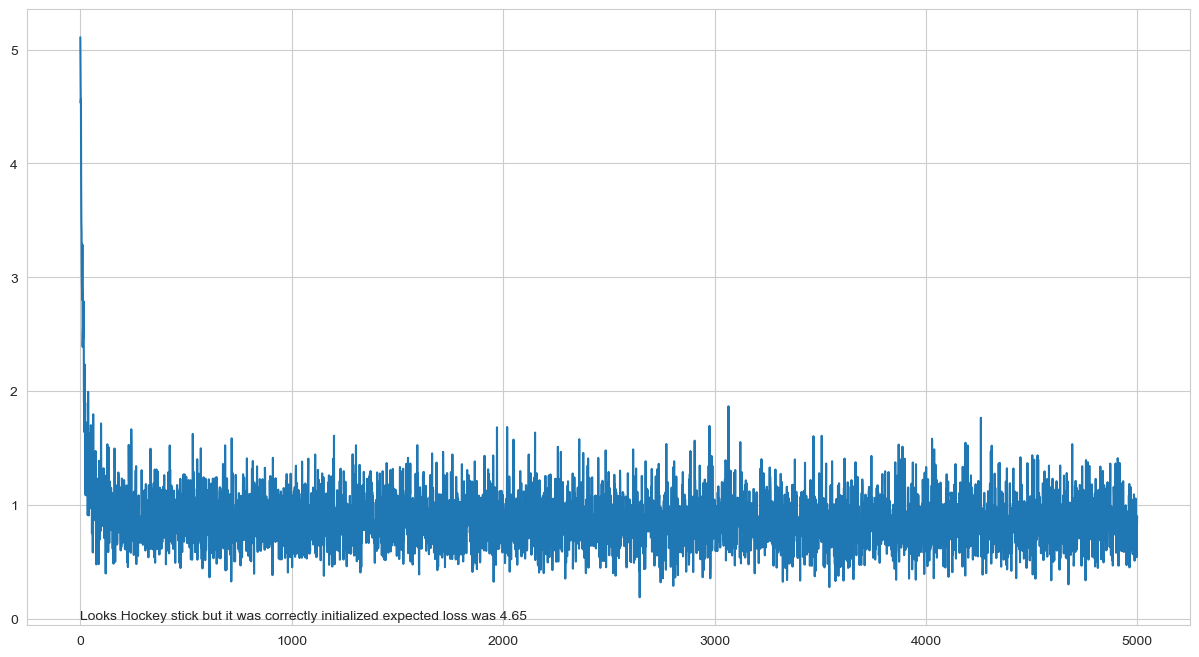

In [26]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,8))
plt.plot(track_loss)
plt.text(-2,0,"Looks Hockey stick but it was correctly initialized expected loss was 4.65")
plt.show()

In [27]:
import numpy as np
np.median(track_loss[:-100])

0.8601484596729279

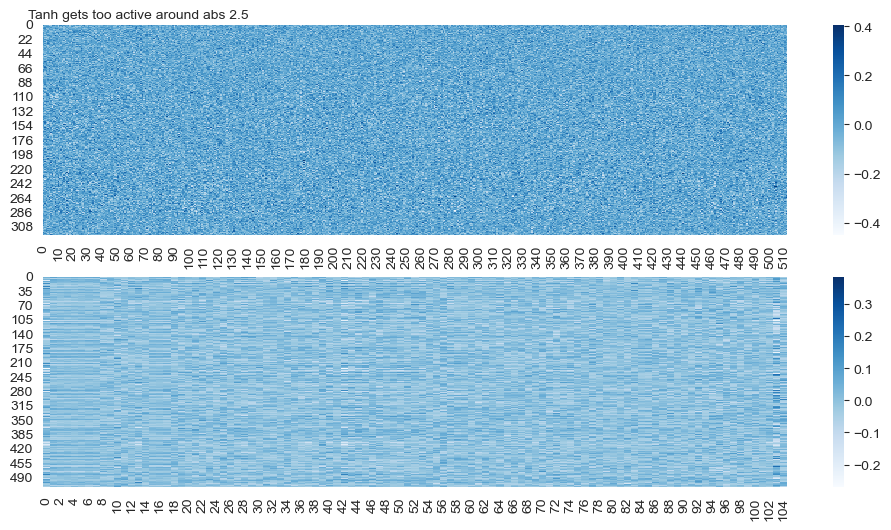

In [29]:
import seaborn as sns
plt.figure(figsize=(12,6))
plt.subplot(2,1,1)
sns.heatmap(cat.W1.detach(),cmap="Blues")
plt.text(-10,-10,"Tanh gets too active around abs 2.5")

plt.subplot(2,1,2)
sns.heatmap(cat.W2.detach(),cmap="Blues")
plt.show()

In [30]:
synthesis = cat.generate()
print(*synthesis,sep="|")

<start>|Private|HS-grad|Never-married|Machine-op-inspct|Own-child|White|Female|United-States|<=50K|<end>


In [31]:
learned_params = 0
for i,p in enumerate(cat.parameters()):
    learned_params += p.nelement()

print(f"Tot Matrics : {i=} , tot learned params {learned_params=}")

Tot Matrics : i=4 , tot learned params learned_params=221577


In [32]:
# calculatiing self attention blocks

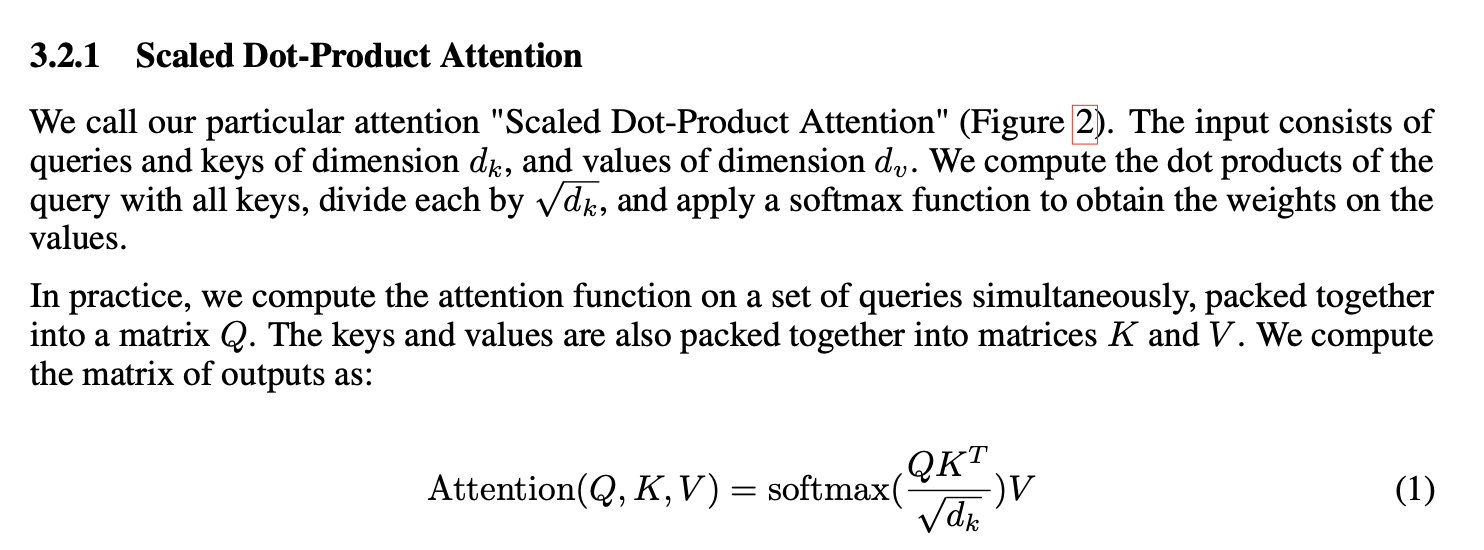

In [33]:
from IPython.display import Image
Image("self_attention.png")

In [34]:
# showing on a random matrix
# B , T , R = 2 , 10 , 32 # 2 examples , 10 tokens , 32 represenation from embedding
# x = torch.randn(B,T,R)

# our examples
x,_ = mini_batch(X_tr,y_tr,(2,))
print(x)
x = cat.C(x) # 2 examples , 10 tokens , 32 represenation from embedding
B,T,R = x.shape


# single head
head_size = torch.tensor(8)
Q = torch.randn(R,head_size) * (1/torch.tensor(2.82))
K = torch.randn(R,head_size)* (1/torch.tensor(2.82))
V = torch.randn(R,head_size)* (1/torch.tensor(2.82))

q = x@Q # (B,T,R) * (R,h) => (B,T,R) x (B,R,h) => (B,T,h) 
k = x@K
v = x@V
print(q.shape)

# each token gets a head sized communication channel (T,h)
# communication
comm = q @ k.transpose(-2,-1) # (B,T,h) @ (B,h,T) => B,T,T @ each tokens interaction with each token would be T,T
print(comm.shape)

att1 = nn.functional.softmax(comm,dim=2) # along tokens head
print(att1.shape)
attention = att1 @ v # B,T,T @ B,T,h => B,T,h
scaled_attention = attention * (1/torch.sqrt(head_size))
print(attention.shape)

tensor([[  0,   0,   0,   0,   0,   0, 103,  77,  39,  62],
        [  0,   0,   0,   0,   0,   0,   0, 103,  77,  87]])
torch.Size([2, 10, 8])
torch.Size([2, 10, 10])
torch.Size([2, 10, 10])
torch.Size([2, 10, 8])


In [35]:
# currently these are made from unlearnt random matrices ... but these would be interesting to look at after they are trained 

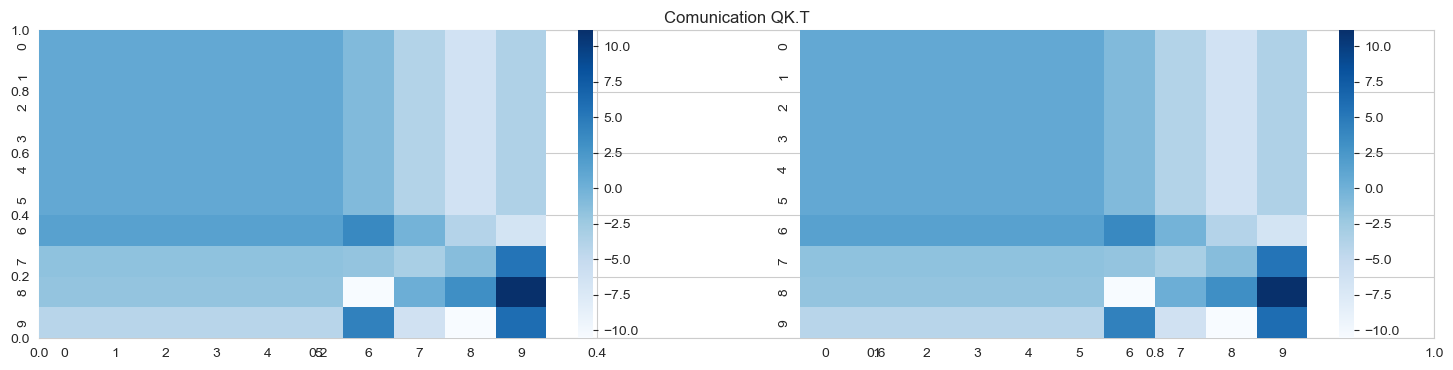

In [36]:
plt.figure(figsize=(18,4))
plt.title("Comunication QK.T")
plt.subplot(1,2,1)
sns.heatmap(comm[0].detach(),cmap="Blues")
plt.subplot(1,2,2)
sns.heatmap(comm[0].detach(),cmap="Blues")
plt.show()

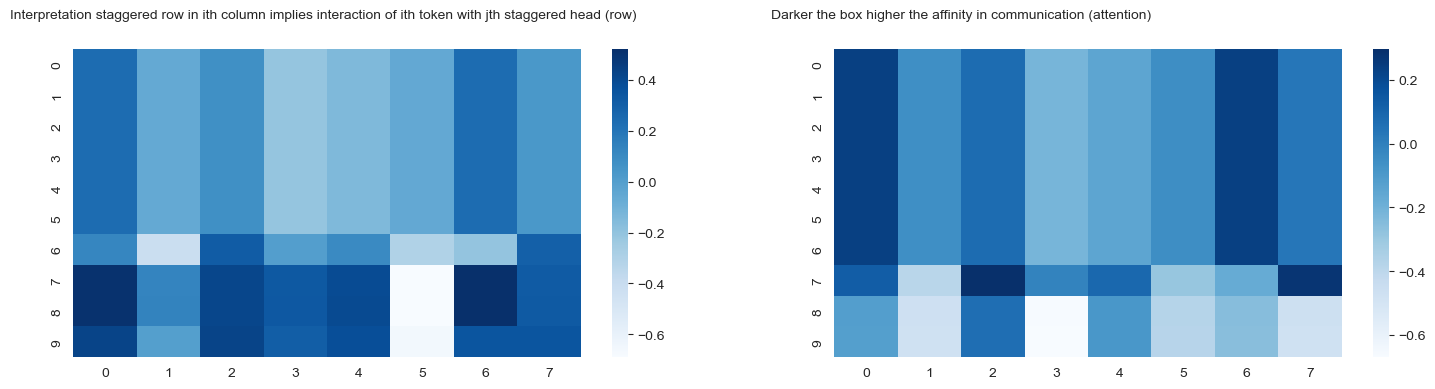

In [37]:
plt.figure(figsize=(18,4))
plt.subplot(1,2,1)
plt.text(-1,-1,"Interpretation staggered row in ith column implies interaction of ith token with jth staggered head (row)")
sns.heatmap(scaled_attention[0].detach(),cmap="Blues")
plt.subplot(1,2,2)
sns.heatmap(scaled_attention[1].detach(),cmap="Blues")
plt.text(-1,-1,"Darker the box higher the affinity in communication (attention)")
plt.show()

In [38]:
class SingleHead(nn.Module):
    """
    Implements a single head of attention (unmasked)
    """
    
    def __init__(self,R=32,head_size=8):
        super().__init__()
        # single head
        self.head_size = torch.tensor(head_size)
        self.R = torch.tensor(R)
        self.Q = nn.Parameter( torch.randn(self.R,head_size) * (1/torch.tensor(2.82)))
        self.K = nn.Parameter( torch.randn(self.R,head_size) * (1/torch.tensor(2.82)))
        self.V = nn.Parameter( torch.randn(self.R,head_size) * (1/torch.tensor(2.82)))
    
    def forward(self,x):
        q = x@Q # (B,T,R) * (R,h) => (B,T,R) x (B,R,h) => (B,T,h) 
        k = x@K
        v = x@V

        comm = q @ k.transpose(-2,-1) # (B,T,h) @ (B,h,T) => B,T,T @ each tokens interaction with each token would be T,T
        att1 = nn.functional.softmax(comm,dim=2) # along tokens head
        attention = att1 @ v # B,T,T @ B,T,h => B,T,h
        scaled_attention = attention * (1/torch.sqrt(head_size))
        return scaled_attention


In [39]:
class CatTransformer(nn.Module):
    def __init__(self):
        super().__init__()
        self._n_embed = 32
        self._n_context_window = 10
        self.head_size = 8
        
        # attention block
        self.single_head = SingleHead(R=self._n_embed,head_size=self.head_size)
        
        # from word embedding (bengio 2003)
        self.C = nn.Embedding(len(vocab),self._n_embed) # some papers also do it sqrt(fan_in)
        
        # this time from head size not vocab length to 512 representation
        self.W1 = nn.Parameter(torch.randn(self._n_context_window * self.head_size , 512))
        torch.nn.init.kaiming_normal_(self.W1 ,nonlinearity="tanh")
        self.b1 = nn.Parameter( torch.randn(1,512) + 0.1 )


        # linear layer
        self.W2 = nn.Parameter( torch.randn(512 , len(vocab)) * 0.01)
        self.b2 = nn.Parameter( torch.randn(1,len(vocab)) + 0.1)
        

        


    def forward(self,x):
        emb = self.C(x) # B,T,R
        att = self.single_head(emb).view(x.shape[0],-1) # B,T,h
        
        h1 = torch.tanh(att@ self.W1 + self.b1)
        logits = h1 @ self.W2 + self.b2
        # loss = nn.functional.cross_entropy(logits,y)
        return logits

    def calculate_loss(self,x,y):
        logits = self(x)
        return logits , nn.functional.cross_entropy(logits,y)


    def generate(self,seed = [0] * 10,verbose=False):
        generation = list()
        i = 0
        while True:
            if i > 15:
                # clearly untrained
                break
            if verbose:
                print(seed)
            logits = self(torch.tensor(seed).view(1,-1))
            probs = nn.functional.softmax(logits,dim=1)
            prediction = torch.multinomial(probs,num_samples=1)
            generation.append(itov[ prediction.item()])
            if itov[prediction.item()] == "<end>":
                break
            seed = seed[1:] + [prediction.item()]
            if verbose:
                print(itov[prediction.item()])
            i = i+1
        return generation

cat_single = CatTransformer()
out = cat_single(X_eg)


In [40]:
optimizer = torch.optim.AdamW(cat_single.parameters(),lr=1e-3)
optimizer

AdamW (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.001
    maximize: False
    weight_decay: 0.01
)

In [41]:
track_loss = list()

In [42]:

for i in tqdm(range(10_000)):
    #sample mini batch
    Xb, yb = mini_batch(X_tr,y_tr)

    # forward pass
    _,loss = cat_single.calculate_loss(Xb,yb)

    # flush the gradients 
    optimizer.zero_grad(set_to_none=True)

    # backprop
    loss.backward()

    # learning step
    optimizer.step()

    # for plotting
    track_loss.append(loss.item())
    ...

100%|██████████| 10000/10000 [00:15<00:00, 665.52it/s]


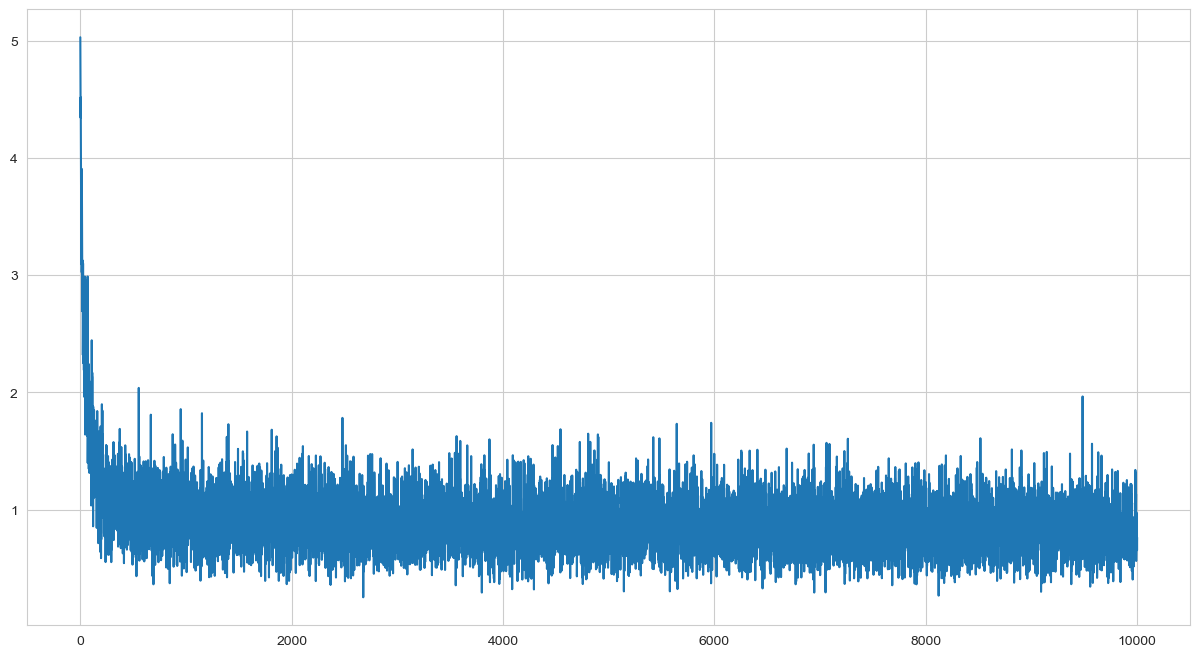

In [43]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,8))
plt.plot(track_loss)
plt.show()

In [44]:
for p in cat_single.parameters():
    print(p.shape)

torch.Size([80, 512])
torch.Size([1, 512])
torch.Size([512, 105])
torch.Size([1, 105])
torch.Size([32, 8])
torch.Size([32, 8])
torch.Size([32, 8])
torch.Size([105, 32])


In [45]:
cat_single.generate()

['<start>',
 'Self-emp-inc',
 'Some-college',
 'Divorced',
 'Adm-clerical',
 'Not-in-family',
 'White',
 'Female',
 'United-States',
 '<=50K',
 '<end>']

In [46]:
import numpy as np
np.median(track_loss[:-100])

0.8559987545013428

In [47]:
communication = cat_single.single_head.Q.detach() @ cat_single.single_head.K.detach().transpose(-2,-1)

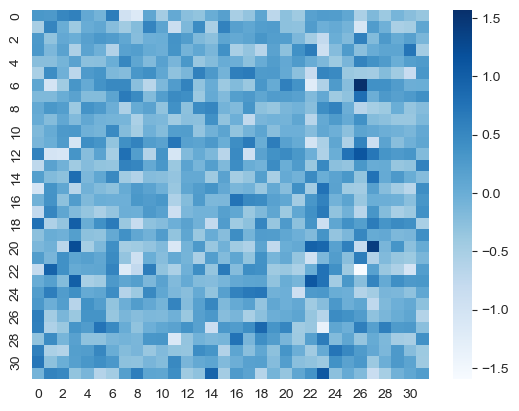

In [48]:
sns.heatmap( communication , cmap="Blues")
plt.show()

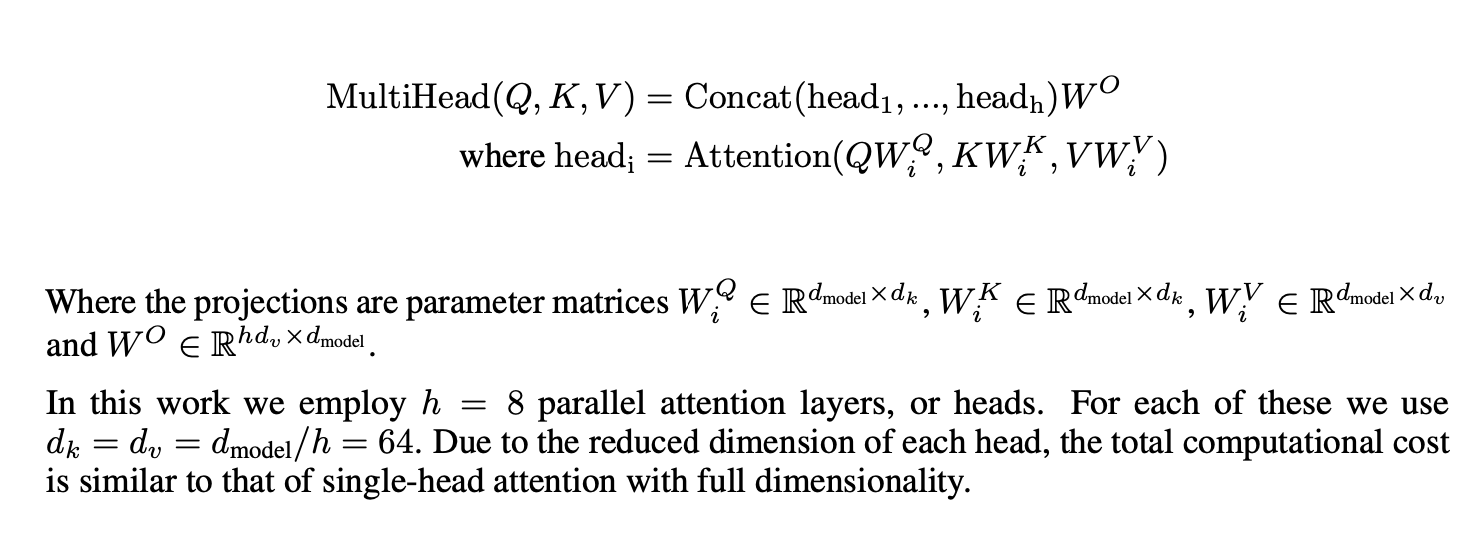

In [49]:
from IPython.display import Image
Image("multi_head.png")

just few single head attention in paralell

In [55]:
class Multihead(nn.Module):
    def __init__(self,R,head_size,n_heads):
        self.R = R
        self.head_size = head_size
        self.n_heads = n_heads
        
        super().__init__()
        self.multiheads = nn.ModuleList(
            [SingleHead(self.R,self.head_size)  for _ in range(self.n_heads)]
        )
    
    def forward(self,x):
        return torch.cat([head(x) for head in self.multiheads],dim=2)

In [64]:
class CatMultiHeadTransformer(nn.Module):
    def __init__(self):
        super().__init__()
        self._n_embed = 32
        self._n_context_window = 10
        self.head_size = 32
        self.n_heads = 4

        # attention block
        self.multi_heads = Multihead(R=self._n_embed,
                                     head_size=self.head_size // self.n_heads,
                                     n_heads=4)

        # from word embedding (bengio 2003)
        self.C = nn.Embedding(len(vocab),self._n_embed) # some papers also do it sqrt(fan_in)

        # this time from head size not vocab length to 512 representation
        self.W1 = nn.Parameter(torch.randn(self._n_context_window * self.head_size , 512))
        torch.nn.init.kaiming_normal_(self.W1 ,nonlinearity="tanh")
        self.b1 = nn.Parameter( torch.randn(1,512) + 0.1 )


        # linear layer
        self.W2 = nn.Parameter( torch.randn(512 , len(vocab)) * 0.01)
        self.b2 = nn.Parameter( torch.randn(1,len(vocab)) + 0.1)





    def forward(self,x):
        emb = self.C(x) # B,T,R
        att = self.multi_heads(emb).view(x.shape[0],-1) # B,T,h

        h1 = torch.tanh(att@ self.W1 + self.b1)
        logits = h1 @ self.W2 + self.b2
        # loss = nn.functional.cross_entropy(logits,y)
        return logits

    def calculate_loss(self,x,y):
        logits = self(x)
        return logits , nn.functional.cross_entropy(logits,y)


    def generate(self,seed = [0] * 10,verbose=False):
        generation = list()
        i = 0
        while True:
            if i > 15:
                # clearly untrained
                break
            if verbose:
                print(seed)
            logits = self(torch.tensor(seed).view(1,-1))
            probs = nn.functional.softmax(logits,dim=1)
            prediction = torch.multinomial(probs,num_samples=1)
            generation.append(itov[ prediction.item()])
            if itov[prediction.item()] == "<end>":
                break
            seed = seed[1:] + [prediction.item()]
            if verbose:
                print(itov[prediction.item()])
            i = i+1
        return generation

cat_multi = CatMultiHeadTransformer()
out = cat_multi(X_eg)


In [65]:
optimizer = torch.optim.AdamW(cat_multi.parameters(),lr=1e-3)
optimizer

AdamW (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.001
    maximize: False
    weight_decay: 0.01
)

In [66]:
track_loss = list()

In [67]:

for i in tqdm(range(10_000)):
    #sample mini batch
    Xb, yb = mini_batch(X_tr,y_tr)

    # forward pass
    _,loss = cat_multi.calculate_loss(Xb,yb)

    # flush the gradients 
    optimizer.zero_grad(set_to_none=True)

    # backprop
    loss.backward()

    # learning step
    optimizer.step()

    # for plotting
    track_loss.append(loss.item())
    ...

100%|██████████| 10000/10000 [00:37<00:00, 265.52it/s]


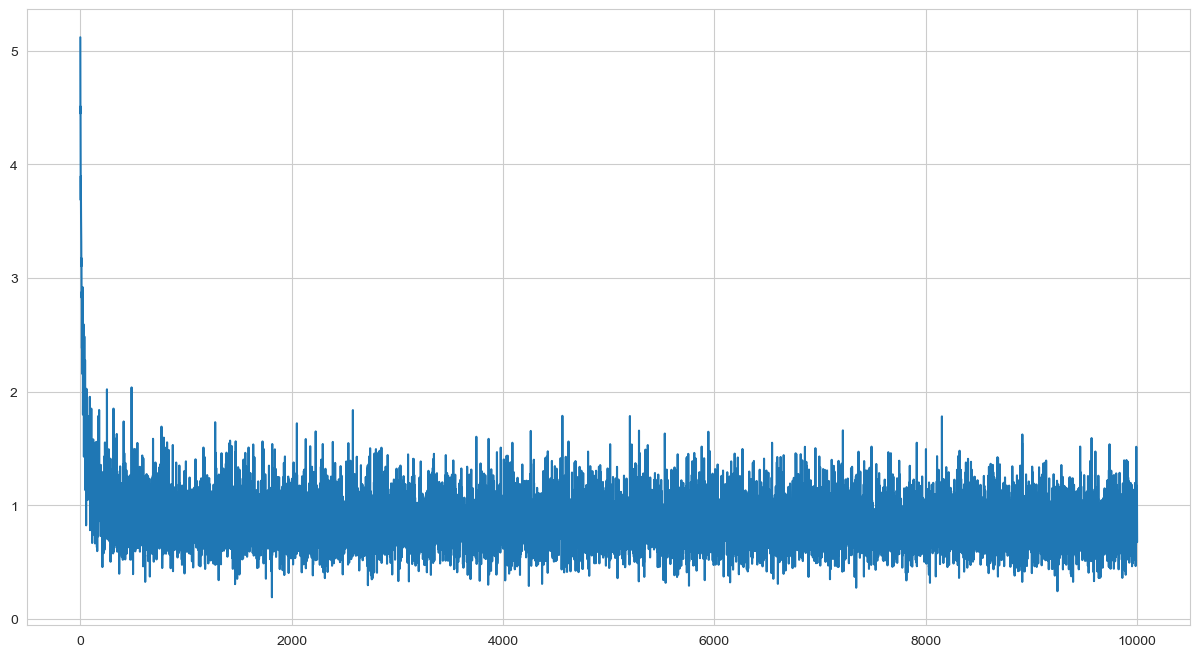

In [68]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,8))
plt.plot(track_loss)
plt.show()

In [69]:
for p in cat_multi.parameters():
    print(p.shape)

torch.Size([320, 512])
torch.Size([1, 512])
torch.Size([512, 105])
torch.Size([1, 105])
torch.Size([32, 8])
torch.Size([32, 8])
torch.Size([32, 8])
torch.Size([32, 8])
torch.Size([32, 8])
torch.Size([32, 8])
torch.Size([32, 8])
torch.Size([32, 8])
torch.Size([32, 8])
torch.Size([32, 8])
torch.Size([32, 8])
torch.Size([32, 8])
torch.Size([105, 32])


In [70]:
np.median(track_loss[:-100])

0.852299839258194

In [74]:
cat_multi.generate()

['<start>',
 'State-gov',
 'Bachelors',
 'Married-civ-spouse',
 'Other-service',
 'Husband',
 'White',
 'Male',
 'United-States',
 '>50K',
 '<end>']